In [1]:
import mssuite.mssuite as ms
import pandas as pd

In [3]:
psms = pd.read_csv("C://Users/Kevin/Desktop/PBLMM_Webinar/20210603_KKL_MH3-23_MEF_F_PSMs.txt",sep='\t',header=0)

In [4]:
defaults = ms.Defaults()

In [5]:
process = ms.Preprocessing(defaults)

In [6]:
psms = process.filter_peptides(psms)

Removing shared peptides
Checking isoforms
Removing contaminants


In [7]:
vis = ms.Visualization(defaults)

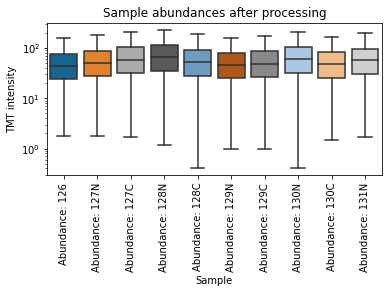

In [8]:
vis.boxplots(psms,'./')

In [9]:
psms = process.total_intensity(psms)

Normalization
Normalization done


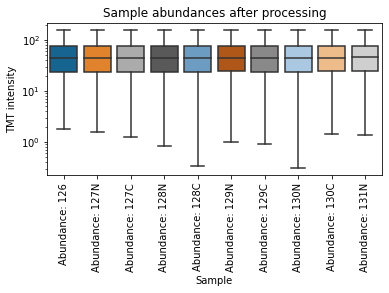

In [10]:
vis.boxplots(psms,'./')

In [11]:
hypo = ms.HypothesisTesting(defaults)
conditions = ['Mock','Mock','Mock','Mock','Mock','Infected','Infected','Infected','Infected','Infected']
data = hypo.peptide_based_lmm_multicore(psms,conditions,drop_missing=True)

499
994
1485
1979
2473
2968
3463
3957
4450
4944
5437
5930
6424
6918
7410
7903


In [22]:
print(data.columns)

Index(['Abundance: 126', 'Abundance: 127N', 'Abundance: 127C',
       'Abundance: 128N', 'Abundance: 128C', 'Abundance: 129N',
       'Abundance: 129C', 'Abundance: 130N', 'Abundance: 130C',
       'Abundance: 131N', 'p_value_Mock_vs_Infected',
       'fold_change_Mock_vs_Infected', 'q_value_Mock_vs_Infected'],
      dtype='object')


In [23]:
comp = list(hypo.get_comparisons())
print(comp)

['_Mock_vs_Infected']


In [24]:
print(hypo.comparison_data)

{'_Mock_vs_Infected': {'name': '_Mock_vs_Infected', 'pvalue': 'p_value_Mock_vs_Infected', 'qvalue': 'q_value_Mock_vs_Infected', 'fold_change': 'fold_change_Mock_vs_Infected'}}


In [25]:
print(hypo.get_columnnames_for_comparison(comparison=comp[0]))

('fold_change_Mock_vs_Infected', 'p_value_Mock_vs_Infected', 'q_value_Mock_vs_Infected')


In [26]:

vis.volcano_plot(data,hypo,comparison=comp[0],wd='./',mode='show')

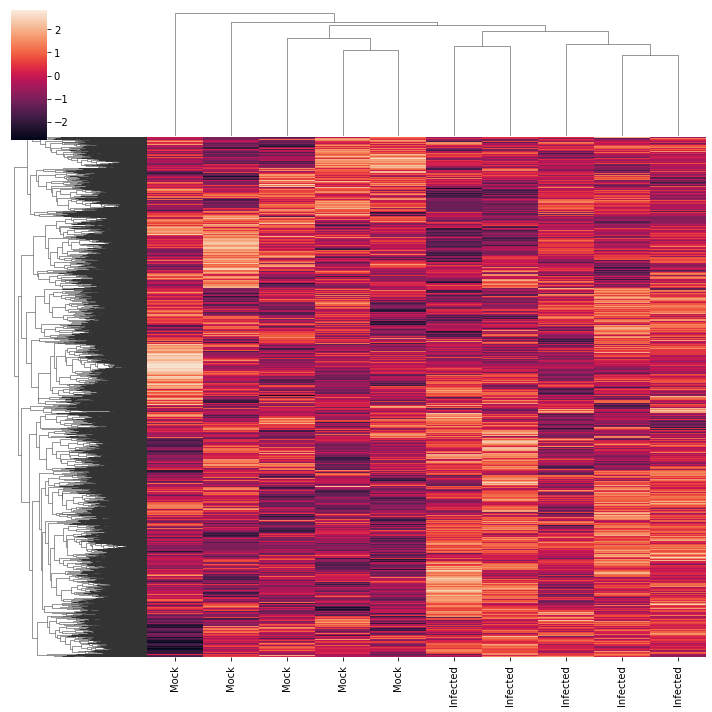

In [27]:
vis.heatmap(data,conditions,wd='./')

In [28]:
pathway = ms.PathwayEnrichment(defaults)

Pathway Enrichment Initialized


In [29]:
genes = hypo.get_significant_hits(data,comparison=comp[0],)
print(genes)

{'up': ['P30306', 'B8JJ69', 'Q62406', 'Q60778', 'Q9WUU8', 'P68433'], 'down': ['P15314', 'P48759', 'Q05769', 'Q99JZ7', 'P0A229', 'Q60765', 'D3YXK0', 'Q8C0Y1', 'P53351', 'Q9CWU0', 'P0A1H5', 'P10148', 'P23950', 'P62746', 'Q8BIQ6', 'Q8C0R0', 'Q9D1C3', 'P06179', 'P17515', 'Q00322', 'Q03366', 'P22893', 'P09450', 'P12850', 'Q60769', 'Q61333', 'Q9D915', 'O08983', 'P07141', 'Q8BLR7', 'Q9QUN7', 'O70139', 'P31240', 'Q04998', 'Q9EST8', 'Q6PDY0', 'P14719', 'P97428', 'Q62392', 'P06869', 'P08032', 'P60853']}


In [30]:
background = list(data.index)
pathway.get_background_sizes(background=background)

In [31]:
enrichment = pathway.get_enrichment(genes['down'])
print(enrichment)

                                                     P value  No. found  \
Description                                                               
Chemokine receptors bind chemokines                 0.000001          3   
MyD88 cascade initiated on plasma membrane          0.000028          2   
The IPAF inflammasome                               0.000028          2   
G alpha (i) signalling events                       0.000374          3   
Sema4D induced cell migration and growth-cone c...  0.000969          2   
Antagonism of Activin by Follistatin                0.005314          1   
Glycoprotein hormones                               0.005314          1   
Biosynthesis of EPA-derived SPMs                    0.005314          1   
Biosynthesis of electrophilic ω-3 PUFA oxo-deri...  0.005314          1   
Biosynthesis of DPAn-3 SPMs                         0.005314          1   
TLR5 cascade                                        0.005314          1   
Beta defensins           